In [11]:
# KORA_S3S4 Data Analysis - Minimum Model - Baseline

import math 
import numpy as np
import pandas as pd
import os
import nbimporter
import DiagnosticPlots
from matplotlib import pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import impute
from IPython.core.debugger import set_trace
import statsmodels.api as sts
import statsmodels.formula.api as smf

%matplotlib inline

### 
## Loading the data and data splitting
### 

In [5]:

KORA_Noise_noMissing = pd.read_csv('C:\\Users\\sahar.behzadi\\Desktop\\Noise2Nako\\Data\\KORA_S3_S4\\KORA_Noise_noMissing_median.csv')

In [7]:
# Covariates

X = KORA_Noise_noMissing.drop(['hyper_p', 'bp_diast', 'bp_syst'], axis = 1)
X_mini = KORA_Noise_noMissing[['sex', 'age', 'bmi', 'smoking', 'lden_org']]
Data = KORA_Noise_noMissing[['sex', 'age', 'bmi', 'smoking', 'lden_org', 'bp_syst']]
print('Data description \n')
print('Sex: Female = 0, Male = 1 \nSmoking: Current = 1, Ex-smoker = 2, Never-smoker =3 \n ')

print(X_mini.head())
X_mini.describe()

Data description 

Sex: Female = 0, Male = 1 
Smoking: Current = 1, Ex-smoker = 2, Never-smoker =3 
 
   sex   age    bmi  smoking  lden_org
0  0.0  31.0  18.94      2.0      41.0
1  1.0  40.0  27.14      2.0      55.2
2  1.0  59.0  30.34      3.0      55.2
3  0.0  62.0  19.46      1.0      46.8
4  0.0  62.0  31.25      2.0      51.2


,sex,age,bmi,smoking,lden_org
count,9116.000000,9116.000000,9116.000000,9116.000000,9116.000000
mean,0.492979,49.555836,27.115082,2.169263,54.721117
std,0.499978,14.033439,4.594119,0.810235,6.587108
min,0.000000,24.000000,15.840000,1.000000,15.600000
25%,0.000000,37.000000,23.940000,1.000000,50.600000
50%,0.000000,50.000000,26.580000,2.000000,53.900000
75%,1.000000,61.000000,29.630000,3.000000,58.500000
max,1.000000,75.000000,56.930000,3.000000,77.500000


In [13]:
# Output

Y_hyper = KORA_Noise_noMissing['hyper_p'].astype(int)
Y_SBP = KORA_Noise_noMissing['bp_syst']
Y_DBP = KORA_Noise_noMissing['bp_diast']


In [14]:
mod = smf.quantreg('bp_syst ~ sex + age + bmi + smoking + lden_org', Data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                bp_syst   Pseudo R-squared:               0.1604
Model:                       QuantReg   Bandwidth:                       3.564
Method:                 Least Squares   Sparsity:                        35.99
Date:                Tue, 25 May 2021   No. Observations:                 9116
Time:                        09:21:19   Df Residuals:                     9110
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.8226      2.006     38.300      0.000      72.891      80.754
sex            8.9232      0.387     23.037      0.000       8.164       9.683
age            0.4894      0.014     34.122      0.000       0.461       0.517
bmi            0.6935      0.043     16.036      0.0

C:\Users\sahar.behzadi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahar.behzadi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sahar.behzadi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

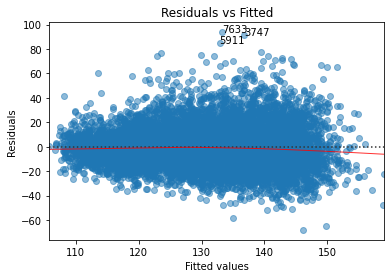

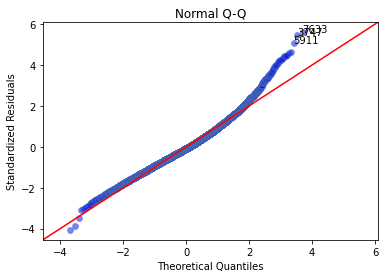

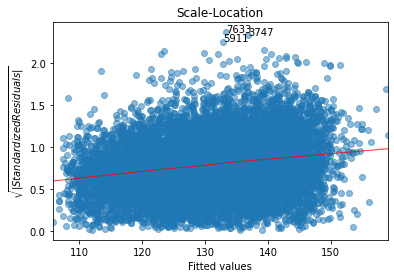

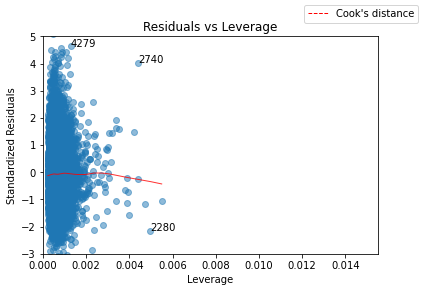

In [15]:
DiagnosticPlots.diagnostic_plots(X_mini, Y_SBP)